<center>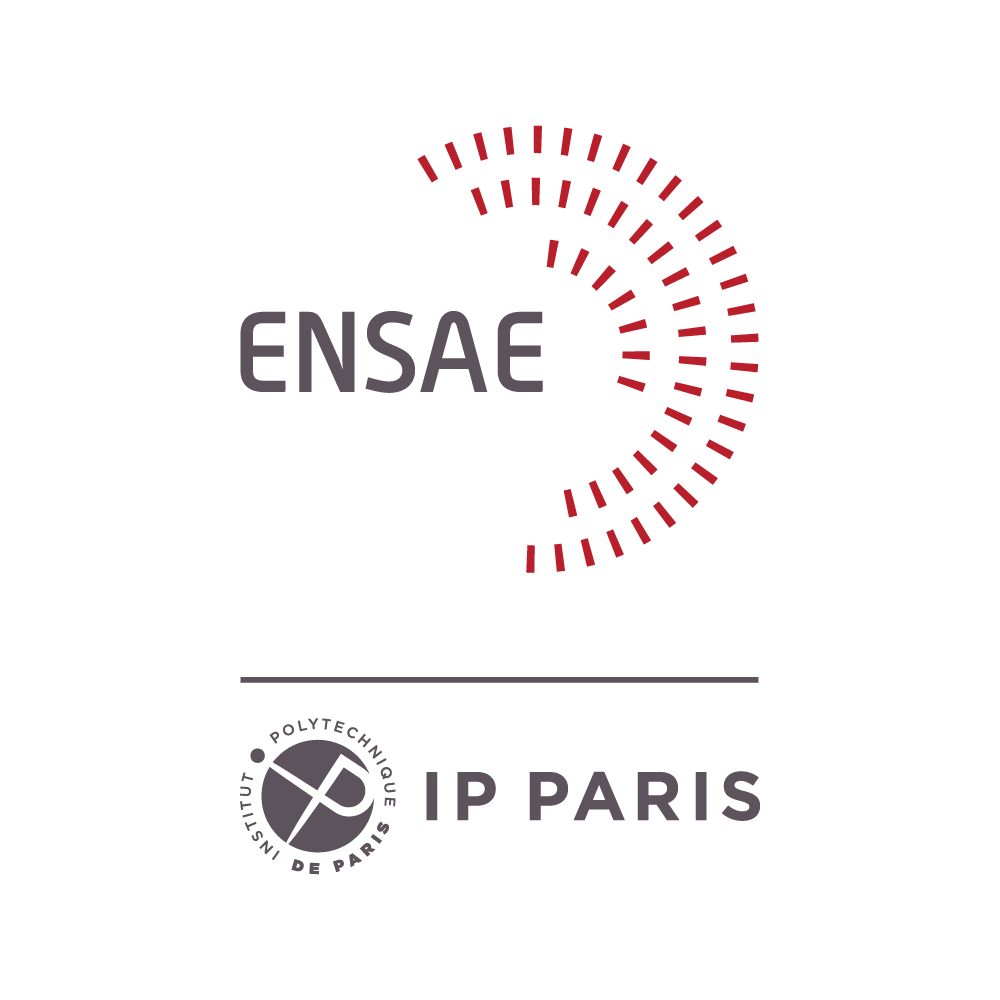</center>

<h1><center><strong><font color="orange">Classification de discours au Congrès des Etats-Unis</font></strong></center></h1>

<h3><center><font color="VenomGreen"><strong>Thomas Doucet & Victoire Dagneau de Richecour</strong></font></center></h3>

<h4><center>
mars-avril 2022 
</center></h4>


# <font color="chillipepper">**Imports and Installation**</font>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install datasets

     |████████████████████████████████| 25.9 MB 20 kB/s 
     |████████████████████████████████| 10.9 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 43.2 MB/s 
     |████████████████████████████████| 102 kB 7.9 MB/s 
     |████████████████████████████████| 690 kB 38.1 MB/s 
     |████████████████████████████████| 4.7 MB 26.6 MB/s 
     |████████████████████████████████| 63 kB 688 kB/s 
     |████████████████████████████████| 812 kB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=57fdd17a33eb2cff14c9a842d454602654bb874ac4a2ddd26119758f078d47ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-jdko0dox/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3909b7daa8240001131c1967bbb81ee39b79f848c0ce942c71598179a22310d1
  Stored in directory: /root/

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored
import tarfile

In [ ]:
# Pour sauvegarder les images
import os
from google.colab import drive
drive.mount("/content/drive")
output_dir = '/content/drive/MyDrive/NLP/images'

Mounted at /content/drive


# <font color="chillipepper">**Data Download**</font>

In [ ]:
! wget https://www.cs.cornell.edu/home/llee/data/convote/convote_v1.1.tar.gz
convote = tarfile.open('convote_v1.1.tar.gz')
convote.extractall()

--2022-04-21 12:38:42--  https://www.cs.cornell.edu/home/llee/data/convote/convote_v1.1.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9837902 (9.4M) [application/x-gzip]
Saving to: ‘convote_v1.1.tar.gz’

convote_v1.1.tar.gz 100%[===================>]   9.38M  4.98MB/s    in 1.9s    

2022-04-21 12:38:45 (4.98 MB/s) - ‘convote_v1.1.tar.gz’ saved [9837902/9837902]



In [ ]:
def create_dataset(repertoire):
  import os
  f=[]

  files = os.listdir(repertoire)

  # Récupération du titre des fichiers, pour en extraire le label : D ou R
  for file in files:
      f.append(file)

  label = []
  for name in f:
    label_temp = name[-7]
    label.append(label_temp)
  label

  # Récupération du contenu des fichiers
  discours = []
  for filename in f:
    with open(os.path.join(repertoire, filename)) as txt:
      d = txt.read()
    discours.append(d)

  df = pd.DataFrame({'texte': discours, 'label':label, 'title':f})
  print(f"Le dataframe contient {len(df)} échantillons.")
  return df

In [ ]:
dir_train = '/content/convote_v1.1/data_stage_one/training_set'
dir_test = '/content/convote_v1.1/data_stage_one/test_set'
dir_val = '/content/convote_v1.1/data_stage_one/development_set'

train = create_dataset(dir_train)
test = create_dataset(dir_test)
val = create_dataset(dir_val)


Le dataframe contient 5660 échantillons.
Le dataframe contient 1759 échantillons.
Le dataframe contient 702 échantillons.


# <font color="chillipepper">**Exploration basique des données**</font>

## Visualisation rapide des données

In [ ]:
train.head()

,texte,label,title
0,i yield to the gentleman from pennsylvania . \n,D,031_400283_0457066_DON.txt
1,"mr. speaker , i reserve the balance of my time...",D,621_400333_3102098_DON.txt
2,"mr. chairman , i yield myself such time as i m...",D,585_400426_2898042_DOY.txt
3,"mr. speaker , i yield 2 minutes to the gentlem...",R,519_400018_2443003_ROY.txt
4,"madam chairman , if ever there was a time when...",D,132_400238_0752097_DON.txt


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texte   5660 non-null   object
 1   label   5660 non-null   object
 2   title   5660 non-null   object
dtypes: object(3)
memory usage: 132.8+ KB


In [ ]:
D = train[train.label == 'D'].shape[0]
print(f"Il y a {D} échantillons démocratiques, soit {D/train.shape[0]*100} % de la base")
R = train[train.label == 'R'].shape[0]
print(f"Il y a {R} échantillons républicains, soit {R/train.shape[0]*100} % de la base")
I = train[train.label == 'I'].shape[0]
print(f"Il y a {I} échantillons inconnus, soit {I/train.shape[0]*100} % de la base")

Il y a 2848 échantillons démocratiques, soit 50.31802120141343 % de la base
Il y a 2786 échantillons républicains, soit 49.2226148409894 % de la base
Il y a 26 échantillons inconnus, soit 0.45936395759717313 % de la base


Vu qu'il n'y a que 26 discours labellisés comme 'Inconnu', on préfère les drop de nos dataframes

In [ ]:
lignes_avant=len(train)
train = train[(train.label.isin(['R','D']))]
lignes_apres=len(train)
print(f'La base de train comptait {lignes_avant} lignes. Elle en compte à présent {lignes_apres}.')

lignes_avant=len(test)
test = test[(test.label.isin(['R','D']))]
lignes_apres=len(test)
print(f'La base de test comptait {lignes_avant} lignes. Elle en compte à présent {lignes_apres}.')

lignes_avant=len(val)
val = val[(val.label.isin(['R','D']))]
lignes_apres=len(val)
print(f'La base de validation comptait {lignes_avant} lignes. Elle en compte à présent {lignes_apres}.')


La base de train comptait 5660 lignes. Elle en compte à présent 5634.
La base de test comptait 1759 lignes. Elle en compte à présent 1754.
La base de validation comptait 702 lignes. Elle en compte à présent 702.


## Valeurs uniques

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(train)

,texte,label,title
Total,5634,5634,5634
Uniques,4848,2,5634


On observe que certains de nos discours au congrès ne sont pas uniques. Les identifiants des discours le sont en revanche. Cela indique que certains discours identiques ont pu être prononcés par différents membres du Congrès, pour différents "bills". Voyons quels sont ces discours.

## Discours en doublons

In [ ]:
top_texts =  8#@param {"type": 'integer'}
items = []
vals = []
for i in range(top_texts):
  itm = train.texte.value_counts().index[i]
  value = train.texte.value_counts().values[i]
  items.append(itm)
  vals.append(value)
pd.DataFrame({"texte":items, "nombre":vals})

,texte,nombre
0,"mr. chairman , will the gentleman yield ? \n",108
1,"mr. speaker , i reserve the balance of my time...",54
2,"mr. chairman , i demand a recorded vote . \n",50
3,"mr. chairman , i yield back the balance of my ...",46
4,"mr. speaker , will the gentleman yield ? \n",40
5,"mr. speaker , on that i demand the yeas and na...",40
6,i yield to the gentleman from wisconsin . \n,36
7,"mr. chairman , i reserve the balance of my tim...",33


## Taille moyenne des textes et dispersions pour un "bill"

In [ ]:
# Mean length of content in characters
train.texte.drop_duplicates().apply(len).mean()

1750.4067656765676

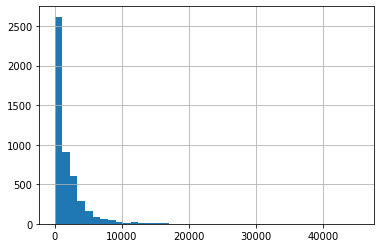

In [ ]:
# Repartition of the content lengths in characters
%matplotlib inline
train.texte.drop_duplicates().apply(len).hist(bins=40)

In [ ]:
# On ajoute la taille en mots du texte considéré
train['texte_len'] = train.texte.apply(lambda x: len(x.split(' ')) )

# On ajoute le numéro du "bill" auquel appartient le discours
train['bill'] = train.title.apply(lambda x: x[:3])
train.head()

,texte,label,title,texte_len,bill
0,i yield to the gentleman from pennsylvania . \n,D,031_400283_0457066_DON.txt,9,031
1,"mr. speaker , i reserve the balance of my time...",D,621_400333_3102098_DON.txt,26,621
2,"mr. chairman , i yield myself such time as i m...",D,585_400426_2898042_DOY.txt,137,585
3,"mr. speaker , i yield 2 minutes to the gentlem...",R,519_400018_2443003_ROY.txt,24,519
4,"madam chairman , if ever there was a time when...",D,132_400238_0752097_DON.txt,599,132


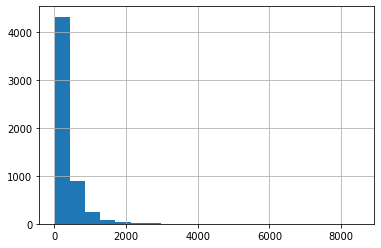

In [ ]:
train.texte_len.hist(bins=20)

In [ ]:
# On créé un rapport automatique et interactif de notre dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="Discours du Congrès", html={"style": {"full_width": True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

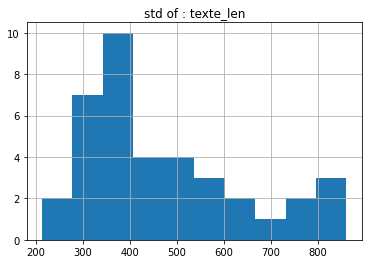

In [ ]:
import matplotlib.pyplot as plt

# On calcule la variance de la longueur du texte pour chaque bill
eval_cols = ["texte_len"]

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  train.groupby(train.bill)[col].std().hist()
  plt.plot()

## Traitement de la ponctuation

On élimine la ponctuation pour éviter tout problème par la suite.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    words_wo_punct = re.sub(r'\n', '',words_wo_punct)
    return words_wo_punct
train['texte_ss_ponct']=train.texte.apply(lambda x: remove_punctuation(x))
test['texte_ss_ponct']=test.texte.apply(lambda x: remove_punctuation(x))

# <font color="chillipepper">**Word-level Preprocessing**</font>

In [ ]:
# Number of words in the vocabulary
arr = train['texte_ss_ponct'].drop_duplicates().apply(lambda x: x.split(' ')).array
arr = [ x for X in arr for x in X]
print(arr[:5])
print('%s "words" in the texts' % (len(set(arr)) ) )

['i', 'yield', 'to', 'the', 'gentleman']
25524 "words" in the texts


## Loi de Zipf

In [ ]:
# Number of words in the vocabulary with tokenizers
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

for tok in tqdm(tokenizers):
  print(f'Tokenizer: {tok}')
  arr = train['texte_ss_ponct'].drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]
  print('The 30 first tokens: %s' % (arr[:30]) )
  print(f"Vocabulary size: {len(set(arr))}")

  0%|          | 0/3 [00:00<?, ?it/s]

Tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fefb5a78a90>
The 30 first tokens: ['i', 'yield', 'to', 'the', 'gentleman', 'from', 'pennsylvania', 'mr', 'speaker', 'i', 'reserve', 'the', 'balance', 'of', 'my', 'time', 'having', 'only', 'one', 'speaker', 'remaining', 'until', 'the', 'other', 'side', 'reaches', 'that', 'point', 'mr', 'chairman']
Vocabulary size: 25522
Tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fefb5a78b10>
The 30 first tokens: ['i', 'yield', 'to', 'the', 'gentleman', 'from', 'pennsylvania', 'mr', 'speaker', 'i', 'reserve', 'the', 'balance', 'of', 'my', 'time', 'having', 'only', 'one', 'speaker', 'remaining', 'until', 'the', 'other', 'side', 'reaches', 'that', 'point', 'mr', 'chairman']
Vocabulary size: 25523
Tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fefb5a78bd0>
The 30 first tokens: ['i', 'yield', 'to', 'the', 'gentleman', 'from', 'pennsylvania', 'mr', 'speaker', 'i', 'reserve', 'the', 'balance', 'of', 'my', 'ti

La loi de Zipf s'applique bien à notre dataset :


  0%|          | 0/3 [00:00<?, ?it/s]

Counter({'the': 88413, 'to': 47417, 'of': 41674, 'and': 37710, 'that': 27598, 'in': 26589, 'a': 23117, 'is': 20621, 'i': 19358, 'this': 18848, 'for': 16056, 'we': 15970, 'it': 12981, 'not': 11302, 'are': 10868, 'have': 10852, 'on': 10709, 'mr': 9591, 'from': 8217, 'be': 7962, 'our': 7895, 'as': 7534, 'bill': 7096, 'with': 6959, 'by': 6532, 'will': 6422, 'they': 6295, 'would': 6270, 's': 5564, 'chairman': 5036, 'do': 4961, 'my': 4812, 'has': 4697, 'their': 4695, 'an': 4638, 'or': 4517, 'but': 4345, 'speaker': 4119, 'gentleman': 4029, 'at': 3857, 'time': 3812, 'who': 3732, 'amendment': 3729, 'us': 3671, 'can': 3643, 'was': 3635, 'all': 3586, 'these': 3526, 'what': 3392, 'if': 3352, 'there': 3303, 'committee': 3263, 'more': 3227, 'people': 3217, 'you': 3205, 'about': 3155, 'so': 3088, 'which': 2803, 'been': 2790, 'one': 2655, 'support': 2648, 'no': 2558, 'those': 2513, 'because': 2507, 'states': 2397, 'other': 2305, 'new': 2278, 'yield': 2272, 'state': 2250, 'federal': 2247, 'energy': 223

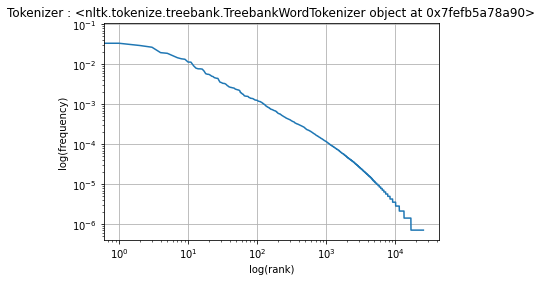

Counter({'the': 88413, 'to': 47417, 'of': 41674, 'and': 37710, 'that': 27598, 'in': 26589, 'a': 23117, 'is': 20621, 'i': 19358, 'this': 18848, 'for': 16056, 'we': 15970, 'it': 12981, 'not': 11301, 'are': 10868, 'have': 10852, 'on': 10709, 'mr': 9591, 'from': 8217, 'be': 7962, 'our': 7895, 'as': 7534, 'bill': 7096, 'with': 6959, 'by': 6532, 'will': 6422, 'they': 6295, 'would': 6270, 's': 5564, 'chairman': 5036, 'do': 4961, 'my': 4812, 'has': 4697, 'their': 4695, 'an': 4638, 'or': 4517, 'but': 4345, 'speaker': 4119, 'gentleman': 4029, 'at': 3857, 'time': 3812, 'who': 3732, 'amendment': 3729, 'us': 3671, 'can': 3642, 'was': 3635, 'all': 3586, 'these': 3526, 'what': 3392, 'if': 3352, 'there': 3303, 'committee': 3263, 'more': 3227, 'people': 3217, 'you': 3205, 'about': 3155, 'so': 3088, 'which': 2803, 'been': 2790, 'one': 2655, 'support': 2648, 'no': 2558, 'those': 2513, 'because': 2507, 'states': 2397, 'other': 2305, 'new': 2278, 'yield': 2272, 'state': 2250, 'federal': 2247, 'energy': 223

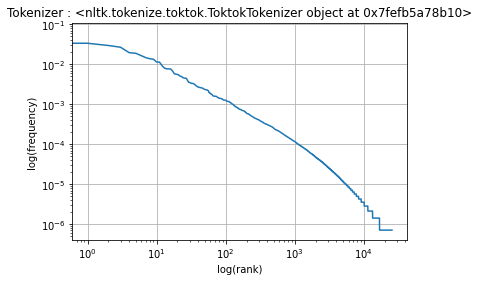

Counter({'the': 88413, 'to': 47417, 'of': 41674, 'and': 37710, 'that': 27598, 'in': 26589, 'a': 23117, 'is': 20621, 'i': 19358, 'this': 18848, 'for': 16056, 'we': 15970, 'it': 12981, 'not': 11301, 'are': 10868, 'have': 10852, 'on': 10709, 'mr': 9591, 'from': 8217, 'be': 7962, 'our': 7895, 'as': 7534, 'bill': 7096, 'with': 6959, 'by': 6532, 'will': 6422, 'they': 6295, 'would': 6270, 's': 5564, 'chairman': 5036, 'do': 4961, 'my': 4812, 'has': 4697, 'their': 4695, 'an': 4638, 'or': 4517, 'but': 4345, 'speaker': 4119, 'gentleman': 4029, 'at': 3857, 'time': 3812, 'who': 3732, 'amendment': 3729, 'us': 3671, 'can': 3642, 'was': 3635, 'all': 3586, 'these': 3526, 'what': 3392, 'if': 3352, 'there': 3303, 'committee': 3263, 'more': 3227, 'people': 3217, 'you': 3205, 'about': 3155, 'so': 3088, 'which': 2803, 'been': 2790, 'one': 2655, 'support': 2648, 'no': 2558, 'those': 2513, 'because': 2507, 'states': 2397, 'other': 2305, 'new': 2278, 'yield': 2272, 'state': 2250, 'federal': 2247, 'energy': 223

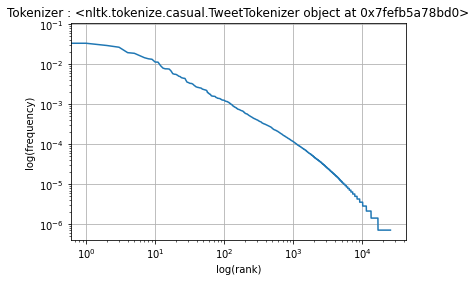

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tqdm(tokenizers):
  arr = train['texte_ss_ponct'].drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list.  
  arr = [ x for X in arr for x in X]
  
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

## Nuages de mots

On visualise des nuages de mots pour voir les mots les plus utilisés

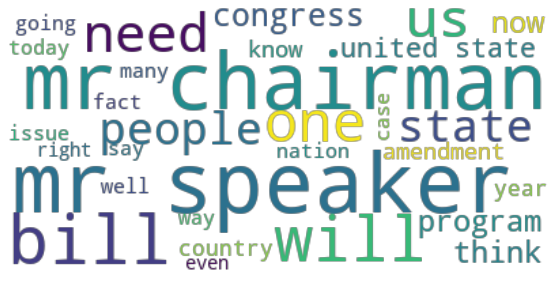

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

# Create and generate a word cloud image:
WC = WordCloud(background_color=None, mode='RGBA', max_words=30)
wordcloud = WC.generate(' '.join(arr))

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(os.path.join(output_dir, 'wordcloud_whole.png'))
plt.show()

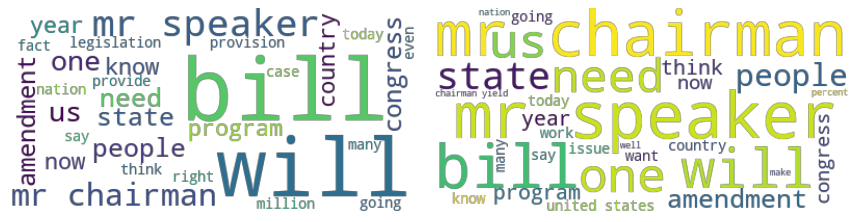

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for label,ax in zip(['D', 'R'], [ax1, ax2]):
  arr = train[train.label==label]['texte_ss_ponct'].drop_duplicates().apply(lambda x: x.split(' ')).array
  arr = [ x for X in arr for x in X]
  # Create and generate a word cloud image:
  WC = WordCloud(background_color=None, mode='RGBA', max_words=30)
  wordcloud = WC.generate(' '.join(arr))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'wordcloud_R&D.png'))
plt.show()

Mots des républicains (à droite) : percent, people, work, issue, United States, program <br>
Mots des démocrates (à gauche) : legislation, provide, provision, nation, right, fact

# <font color="chillipepper">**Topic Modelling**</font>


In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = train.texte.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed, tok.tokenize(x)))).array
print(text_data[45])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['mr.', 'speaker', 'yield', '3', 'minutes', 'gentleman', 'south', 'carolina', 'mr.', 'spratt', 'xz4003860']


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 10.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=225692e99efe231b457ab6143461c53341bb46d765823c268ceab0f24da141b0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# <font color="chillipepper">**Premier Embedding: TF-IDF**</font>


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [ ]:
tokens = vectorizer.fit_transform(train['texte_ss_ponct'])
tokens

<5634x25190 sparse matrix of type '<class 'numpy.float64'>'
	with 438036 stored elements in Compressed Sparse Row format>

On représente les discours en 2D, après une transformation par un SVD des poids donnés par le TF-IDF

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
tokens_svd = svd.fit_transform(tokens)

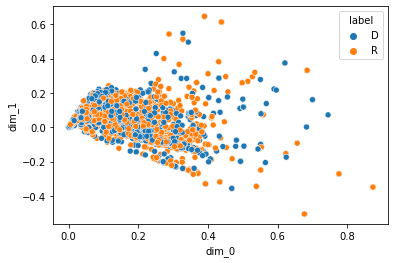

In [ ]:
import seaborn as sns
scatter_svd = pd.DataFrame({'dim_0':tokens_svd[:,0], 'dim_1':tokens_svd[:,1], 'label': train.label})
sns.scatterplot(data=scatter_svd, x='dim_0', y='dim_1', hue='label',)
plt.savefig(os.path.join(output_dir, 'tfidf_representation.png'))

On tente une visualisation avec TSNE pour voir les changements. <br>
*"It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results."*


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tokens_tsne = tsne.fit_transform(tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


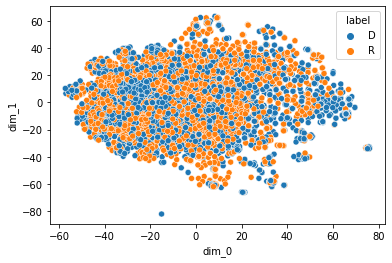

In [ ]:
import seaborn as sns
scatter_tsne = pd.DataFrame({'dim_0':tokens_tsne[:,0], 'dim_1':tokens_tsne[:,1], 'label': train.label})
sns.scatterplot(data=scatter_tsne, x='dim_0', y='dim_1', hue='label',)
plt.savefig(os.path.join(output_dir, 'tfidf_tsne_representation.png'))

# <font color="chillipepper">**Premier modèle "naïf"**</font>


On applique maintenant une Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf = RandomForestClassifier(random_state=42)
clf.fit(tokens, train.label)
actuals = train.label
preds = clf.predict(tokens)
f1_train = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de train est de {}.'.format(f1_train))

Le F1 score pour la base de train est de 0.9493626062322946.


In [ ]:
test_tokens = vectorizer.transform(test['texte_ss_ponct'])
actuals = test.label
preds = clf.predict(test_tokens)
f1_test = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de test est de {}.'.format(f1_test))

Le F1 score pour la base de test est de 0.6990179087232814.


On plot la matrice de confusion

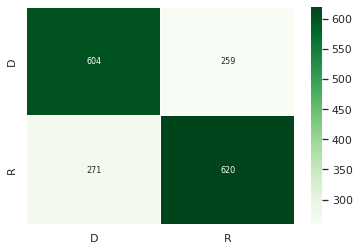

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.show()


In [ ]:
print(classification_report(actuals, preds))

              precision    recall  f1-score   support

           D       0.69      0.70      0.70       863
           R       0.71      0.70      0.70       891

    accuracy                           0.70      1754
   macro avg       0.70      0.70      0.70      1754
weighted avg       0.70      0.70      0.70      1754



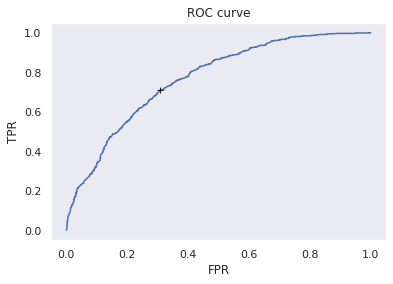

In [ ]:
preds_proba = clf.predict_proba(test_tokens)[:, 1]
fpr, tpr, thresholds = roc_curve(actuals.replace({'D':0,'R':1}), preds_proba)
idx = np.argmin(fpr + (1-tpr))

plt.plot(fpr, tpr, label='RF')
plt.plot(fpr[idx], tpr[idx], '+', color='k')
plt.title('ROC curve'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.grid()

# <font color="chillipepper">**Fine-tuning de la RandomForest**</font>


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

import time

In [ ]:
model_list=[]
nb_cv=4
f1_scorer = make_scorer(f1_score, pos_label="R")

models = [("tree_clf", DecisionTreeClassifier()),
          ("rdm_frt", RandomForestClassifier(n_jobs= -1))]


grids = {"tree_clf" : {'tree_clf__criterion' : ['gini', 'entropy'],       # Evaluation de la séparation d'un noeud
                       'tree_clf__max_depth': [4, 6, 8, 12,15],           # Profondeur maximale de l'arbre
                       'tree_clf__min_samples_split' :[0.01, 0.05, 0.1]}, # Proportion minimale au sein d'une feuille
         
         "rdm_frt" : {  'rdm_frt__max_depth': [2,8,None],                 # Profondeur maximale des arbres
                        'rdm_frt__max_features': ['sqrt'],                # Nombre de features testées à chaque noeud
                        'rdm_frt__criterion' : ['gini', 'entropy'],       # Evaluation de la séparation d'un noeud
                        'rdm_frt__min_samples_split': [5,10,0.001],       # Proportion minimale au sein d'une feuille
                        'rdm_frt__n_estimators': [100, 300, 500]},        # Nombre d'arbres de décision
        }

actuals = test.label
for name, model in models:
    start_time=time.time()
    pipe = Pipeline([(name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=nb_cv,scoring=f1_scorer)
    clf.fit(tokens, train.label)
    model_list.append(clf)

    print('\033[1m' + " Results for {}:".format(name) + '\033[0m')
    print(' Returned hyperparameter: {}'.format(clf.best_params_))
    print(' Best classification F1-score in validation is: {}'.format(round(clf.best_score_,3)))
    print(' F1-score on test is: {}'.format(clf.score(test_tokens, actuals)),end='\n\n')
    print("--------- %s secondes ---------" % (round(time.time() - start_time,2)))
    print('-----------------------------------------------------',end='\n\n')

 Results for tree_clf:
 Returned hyperparameter: {'tree_clf__criterion': 'entropy', 'tree_clf__max_depth': 12, 'tree_clf__min_samples_split': 0.05}
 Best classification F1-score in validation is: 0.651
 F1-score on test is: 0.5686274509803922

--------- 59.9 secondes ---------
-----------------------------------------------------

 Results for rdm_frt:
 Returned hyperparameter: {'rdm_frt__criterion': 'entropy', 'rdm_frt__max_depth': None, 'rdm_frt__max_features': 'sqrt', 'rdm_frt__min_samples_split': 0.001, 'rdm_frt__n_estimators': 500}
 Best classification F1-score in validation is: 0.731
 F1-score on test is: 0.7200902934537247

--------- 2256.08 secondes ---------
-----------------------------------------------------



Le F1 score pour la base de test est de 0.7198203256597416.



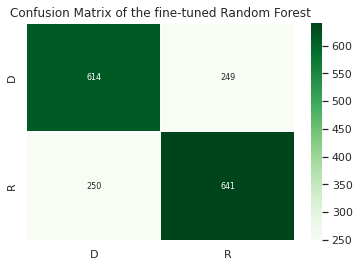

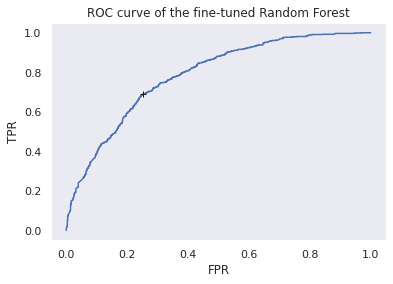

In [ ]:
# Avec les meilleurs params
clf_rmdF = RandomForestClassifier(criterion='entropy', 
                                  max_depth= None, 
                                  max_features='sqrt', 
                                  min_samples_split=5, 
                                  n_estimators=500)
clf_rmdF.fit(tokens, train.label)

preds = clf_rmdF.predict(test_tokens)
f1_test = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de test est de {}.'.format(f1_test),end='\n\n')

cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf_rmdF.classes_, columns=clf_rmdF.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.title('Confusion Matrix of the fine-tuned Random Forest')
plt.savefig(os.path.join(output_dir, 'confmat_finetuned_rf.png'))
plt.show()

print('')
preds_proba = clf_rmdF.predict_proba(test_tokens)[:, 1]
fpr, tpr, thresholds =roc_curve(actuals.replace({'D':0,'R':1}), preds_proba)
idx = np.argmin(fpr + (1-tpr))
plt.plot(fpr, tpr, label='RF'); plt.plot(fpr[idx], tpr[idx], '+', color='k')
plt.title('ROC curve of the fine-tuned Random Forest'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.grid()
plt.savefig(os.path.join(output_dir, 'roc_finetuned_rf.png'))

# <font color="chillipepper">**Deuxième Embedding: Word2Vec**</font>


## Entrainement du Word2Vec

In [ ]:
from gensim.models import phrases
corpus = train["texte_ss_ponct"].append(test["texte_ss_ponct"]) 

# create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)


In [ ]:
# create vocabulary
from tensorflow.keras import preprocessing as kprocessing
tokenizer = kprocessing.text.Tokenizer(lower=True, 
                                       split=' ', 
                                       oov_token="NaN", 
                                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
                                       )
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
print("Le vocabulaire du Word2Vec compte {} mots.".format(len(dic_vocabulary)))

Le vocabulaire du Word2Vec compte 29448 mots.


In [ ]:
# train custom w2v instance
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

size_vecteur=300
print("\nTraining the corpus Word2Vec...")
pol = Word2Vec(lst_corpus, size=size_vecteur, window=15, min_count=3, workers=cpu)
pol.train(lst_corpus, total_examples=len(lst_corpus), epochs=10)
pol_wv = pol.wv

The virtual instance has 2 cpus, that will be used to train the word2vec model

Training the corpus Word2Vec...


In [ ]:
pol_wv.word_vec('state').shape

(300,)

## Création des matrices X_train et X_test

On choisit une taille max de discours à ... mots.

In [ ]:
# tokenize text
from tensorflow.keras import preprocessing as kprocessing
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

# text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(train['texte_ss_ponct'])

# pad sequence
sequence_length=200 #@param {"type": 'integer'}
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=sequence_length, padding="post", truncating="post")

In [ ]:
i = 1

## list of text:
len_txt = len(train["texte_ss_ponct"].iloc[i].split())
print("from: ", train["texte_ss_ponct"].iloc[i], "| len:", len_txt)

## sequence of token ids: 
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary:
print("check: ", train["texte_ss_ponct"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[train["texte_ss_ponct"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  mr speaker  i reserve the balance of my time  having only one speaker remaining  until the other side reaches that point   | len: 21
to:  [  19   38   10  312    2  164    4   31   41  430  107   62   38 1353
  714    2   68  313 7017    6  235    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

Même opération pour le dataset de test

In [ ]:
# text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(test['texte_ss_ponct'])

# padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=sequence_length,
             padding="post", truncating="post")

In [ ]:
# start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, size_vecteur))
for word,idx in dic_vocabulary.items():
    # update the row with vector
    try:
        embeddings[idx] = pol_wv[word]

    # if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
word = "mr"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 19 |idx
embeddings[idx]: (300,) |vector


## Tests de similarité des mots

In [ ]:
def closest_to(w, pol_wv,n=10):
    closest_ws =[w[0] for w in pol_wv.most_similar(w, topn=n)]
    print("The closest {} words to \"{}\" " 
    "are: \n {}".format(n, w, '"'+'",\n then "'.join(closest_ws)+'"'))

In [ ]:
closest_to('man',pol_wv)
print('========================================================================')
closest_to('woman',pol_wv)
print('========================================================================')
closest_to('politicians',pol_wv)
print('========================================================================')
closest_to('money',pol_wv)
print('========================================================================')
closest_to('issue',pol_wv)

The closest 10 words to "man" are: 
 "woman",
 then "lady",
 then "son",
 then "wheelchair",
 then "story",
 then "girl",
 then "mother",
 then "cody",
 then "guy",
 then "uncle"
The closest 10 words to "woman" are: 
 "man",
 then "girl",
 then "person",
 then "someone",
 then "mother",
 then "lady",
 then "husband",
 then "physician",
 then "son",
 then "parent"
The closest 10 words to "politicians" are: 
 "ideology",
 then "scientifically",
 then "politically",
 then "moral",
 then "transparent",
 then "ideally",
 then "decisions",
 then "political",
 then "scientific",
 then "politicize"
The closest 10 words to "money" are: 
 "dollars",
 then "funds",
 then "borrow",
 then "dollar",
 then "billions",
 then "expended",
 then "taxpayer",
 then "spend",
 then "pay",
 then "sums"
The closest 10 words to "issue" are: 
 "issues",
 then "discussion",
 then "topic",
 then "occasion",
 then "debate",
 then "question",
 then "problem",
 then "aspect",
 then "matter",
 then "institution"


## Random Forest sur l'embedding Word2Vec

In [ ]:
import numpy

def get_vect(word, model):
  # Vecturer les vecteurs d'un mot
    try:
        return model[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
   # Somme des vecteurs d'un document
    return sum(get_vect(w, model) for w in phrase)

def mean_vectors(phrase, model):
  # Moyenne du vecteur d'un mot
  return [np.mean(get_vect(w, model)) for w in phrase]


def word2vec_features_sum(X, model):
  # Construction des features pour le corpus :
  # Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

def word2vec_features_mean(X, model):
  # Construction des features pour le corpus :
  # Pour chaque phrase, on associe à chaque  mot la moyenne de son vecteur du Word2Vec
    feats = numpy.vstack([mean_vectors(p, model) for p in X])
    return feats


In [ ]:
# Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent
wv_train_feat_sum = word2vec_features_sum(X_train, embeddings)
print(wv_train_feat_sum.shape)
wv_test_feat_sum = word2vec_features_sum(X_test, embeddings)
print(wv_test_feat_sum.shape)

(5634, 300)
(1754, 300)


In [ ]:
# Pour chaque phrase, on associe à chaque  mot la moyenne de son vecteur du Word2Vec
wv_train_feat = word2vec_features_mean(X_train, embeddings)
print(wv_train_feat.shape)
wv_test_feat = word2vec_features_mean(X_test, embeddings)
print(wv_test_feat.shape)

(5634, 200)
(1754, 200)


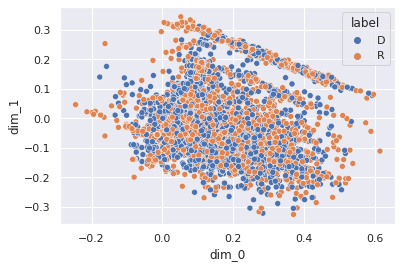

In [ ]:
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
tokens_svd = svd.fit_transform(wv_train_feat)
tokens_svd = pd.DataFrame({'dim_0':tokens_svd[:,0], 'dim_1':tokens_svd[:,1], 'label': train.label})
sns.scatterplot(data=tokens_svd, x='dim_0', y='dim_1', hue='label',)
plt.savefig(os.path.join(output_dir, 'w2v_representation.png'))

Le F1 score pour la base de train est de 0.9525999292536257.

Matrice de confusion échantillon de train :


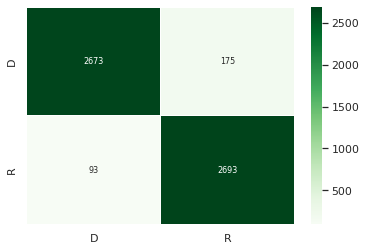

Le F1 score pour la base de test est de 0.664433277498604.

Matrice de confusion échantillon de test :


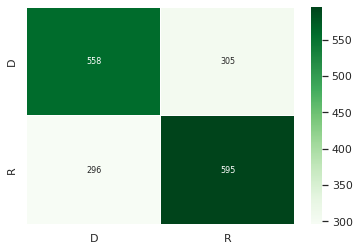

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import seaborn as sns


# Avec les paramètre de la Random Forest fine-tuned
clf = RandomForestClassifier(random_state=42,
                             criterion='entropy', 
                             max_depth= None, 
                             max_features='sqrt', 
                             min_samples_split=5, 
                             n_estimators=500)

clf.fit(wv_train_feat_sum, train.label)
actuals = train.label
preds = clf.predict(wv_train_feat_sum)
f1_train = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de train est de {}.'.format(f1_train),end='\n\n')

print('Matrice de confusion échantillon de train :')
cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.show()

actuals = test.label
preds = clf.predict(wv_test_feat_sum)
f1_test = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de test est de {}.'.format(f1_test),end='\n\n')

print('Matrice de confusion échantillon de test :')
cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.show()

## Random Forest sur le pretrained Word2Vec

In [ ]:
# Notre Word2Vec obtient de faibles performances
# Récupération d'un Word2Vec pretrained 
import gensim.downloader as gensim_api
pol_pre_trained = gensim_api.load("word2vec-google-news-300")
pol_pre_trained_wv=pol_pre_trained.wv

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [ ]:
# start the matrix (length of vocabulary x vector size) with all 0s
embeddings_pretrained = np.zeros((len(dic_vocabulary)+1, size_vecteur))
for word,idx in dic_vocabulary.items():
    # update the row with vector
    try:
        embeddings_pretrained[idx] = pol_pre_trained[word]
    # if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
# Pour chaque phrase, on associe à chaque mot la moyenne de son vecteur du Word2Vec
wv_train_feat_pretrained = word2vec_features_mean(X_train, embeddings_pretrained)
print(wv_train_feat_pretrained.shape)
wv_test_feat_pretrained = word2vec_features_mean(X_test, embeddings_pretrained)
print(wv_test_feat_pretrained.shape)

(5634, 200)
(1754, 200)


Le F1 score pour la base de train est de 0.8810509267590427.

Matrice de confusion échantillon de train :


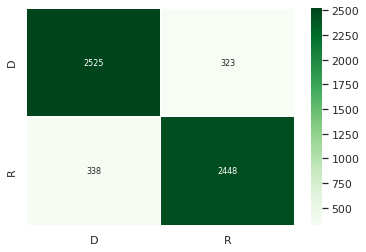

Le F1 score pour la base de test est de 0.5169545745361485.

Matrice de confusion échantillon de test :


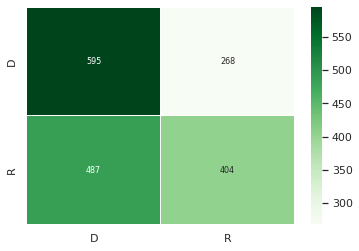

In [ ]:
clf = RandomForestClassifier(random_state=42,criterion='entropy', 
                              max_depth= 20, 
                              max_features='sqrt', 
                              min_samples_split=10, 
                              n_estimators=300)

clf.fit(wv_train_feat_pretrained, train.label)
actuals = train.label
preds = clf.predict(wv_train_feat_pretrained)
f1_train = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de train est de {}.'.format(f1_train),end='\n\n')

print('Matrice de confusion échantillon de train :')
cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.show()

actuals = test.label
preds = clf.predict(wv_test_feat_pretrained)
f1_test = f1_score(actuals, preds, average='binary', pos_label='R')
print('Le F1 score pour la base de test est de {}.'.format(f1_test),end='\n\n')

print('Matrice de confusion échantillon de test :')
cm = confusion_matrix(actuals, preds, labels=clf.classes_)
df_cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.show()

# <font color="chillipepper">**Deep Learning: LSTM**</font>


In [ ]:
# Import de tensorflow
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K

## Création du modèle

In [ ]:
# Hyperparamètres
from tensorflow.keras.optimizers import Adam
learning_rate=0.001
optimizer = Adam(learning_rate=learning_rate)
dropout = 0.2
dense_units = [128,64]
nb_epochs=15
embeddings_layer=embeddings

In [ ]:
## input
x_in = layers.Input(shape=(sequence_length,))

## embedding
x = layers.Embedding(input_dim=embeddings_layer.shape[0],  
                     output_dim=embeddings_layer.shape[1], 
                     weights=[embeddings_layer],
                     input_length=sequence_length, trainable=False)(x_in)

## 2 layers of bidirectional lstm
# x = layers.LSTM(units=sequence_length, dropout=dropout)(x)
x = layers.Bidirectional(layers.LSTM(units=100, dropout=dropout, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=100, dropout=dropout))(x)

# final dense layers
x = layers.Dense(dense_units[0], activation='relu')(x)
x = layers.Dense(dense_units[1], activation='relu')(x)
y_out = layers.Dense(2, activation='softmax')(x)

## compile
model = models.Model(x_in, y_out)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='SparseCategoricalCrossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          8834700   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 200)         320800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

## Entraînement

In [ ]:
# Encoder y pour la perte Sparse Categorical Cross-Entropy

y_train = train['label']


dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Encoder y pour la perte Binary Cross Entropy 
y_train_encode=np.array([[1,0] if y==1 else [0,1] for y in y_train])
y_train_encode

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

Epoch 1/15
62/62 [==============================] - 132s 2s/step - loss: 0.6871 - accuracy: 0.5443 - val_loss: 0.6779 - val_accuracy: 0.5636
Epoch 2/15
62/62 [==============================] - 112s 2s/step - loss: 0.6380 - accuracy: 0.6264 - val_loss: 0.6613 - val_accuracy: 0.6026
Epoch 3/15
62/62 [==============================] - 112s 2s/step - loss: 0.5894 - accuracy: 0.6703 - val_loss: 0.6899 - val_accuracy: 0.6174
Epoch 4/15
62/62 [==============================] - 110s 2s/step - loss: 0.5214 - accuracy: 0.7225 - val_loss: 0.6921 - val_accuracy: 0.6375
Epoch 5/15
62/62 [==============================] - 110s 2s/step - loss: 0.4605 - accuracy: 0.7626 - val_loss: 0.7742 - val_accuracy: 0.6298
Epoch 6/15
62/62 [==============================] - 110s 2s/step - loss: 0.3794 - accuracy: 0.8083 - val_loss: 0.9515 - val_accuracy: 0.6115
Epoch 7/15
62/62 [==============================] - 110s 2s/step - loss: 0.3458 - accuracy: 0.8237 - val_loss: 0.9616 - val_accuracy: 0.6067
Epoch 8/15
62

<Figure size 576x288 with 0 Axes>

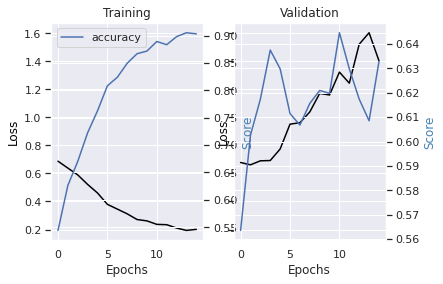

In [ ]:
# train

training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=nb_epochs, shuffle=True, verbose=1, 
                     validation_split=0.3,)

# plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
plt.figure(figsize=(8,4))
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')

for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

## Validation

In [ ]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

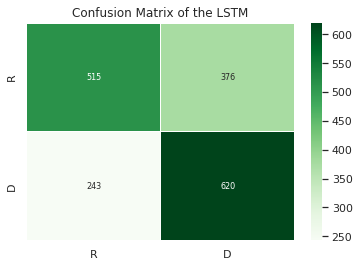

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
actuals = test.label
classes = test.label.unique()
cm = confusion_matrix(actuals, predicted, labels=classes)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='Greens', linewidth=0.5, fmt="")
plt.title('Confusion Matrix of the LSTM')
plt.savefig(os.path.join(output_dir, 'confmat_lstm.png'))
plt.show()

              precision    recall  f1-score   support

           D       0.62      0.72      0.67       863
           R       0.68      0.58      0.62       891

    accuracy                           0.65      1754
   macro avg       0.65      0.65      0.65      1754
weighted avg       0.65      0.65      0.65      1754



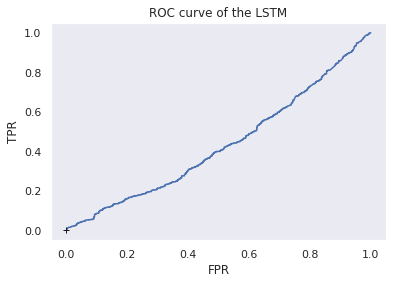

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actuals, predicted))

from sklearn.metrics import roc_curve, auc, plot_roc_curve
preds_proba = [max(pred) for pred in predicted_prob]
fpr, tpr, thresholds = roc_curve(actuals.replace({'D':0,'R':1}), preds_proba)
idx = np.argmin(fpr + (tpr))

plt.plot(fpr, tpr, label='RF')
plt.plot(fpr[idx], tpr[idx], '+', color='k')
plt.title('ROC curve of the LSTM'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.grid()
plt.savefig(os.path.join(output_dir, 'roc_lstm.png'))
